M0 (rho_DM0) = 2.30e-27 kg/m^3
N0 (rho_DE0) = 5.80e-27 kg/m^3
Valores de t_applied (s):
z=0.0: t_applied=4.6e+17 s
z=1089.0: t_applied=1.6e+13 s


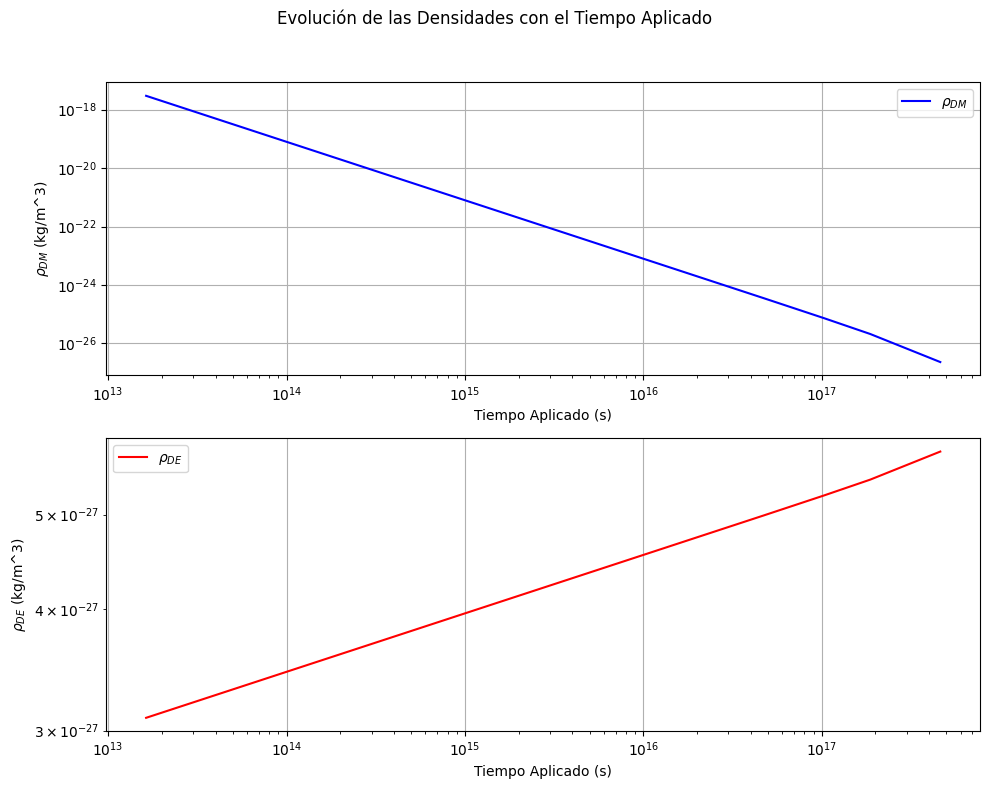

Tiempo de ejecución: 1.940 segundos


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import time

# Iniciar el cronómetro
start_time = time.time()

# Constantes cosmológicas (valores de ejemplo basados en parámetros típicos)
H0 = 67.4  # Constante de Hubble en km/s/Mpc
H0 = H0 * 3.24078e-20  # Convertir a s^-1 (1 km/s/Mpc = 3.24078e-20 s^-1)
Omega_m0 = 0.27  # Densidad de materia oscura hoy
Omega_DE0 = 0.68  # Densidad de energía oscura hoy
rho_c0 = 3 * H0**2 / (8 * np.pi * 6.67430e-11)  # Densidad crítica hoy (en kg/m^3)
M0 = Omega_m0 * rho_c0  # Densidad de materia oscura hoy (rho_DM0)
N0 = Omega_DE0 * rho_c0  # Densidad de energía oscura hoy (rho_DE0)

# Imprimir M0 y N0
print(f"M0 (rho_DM0) = {M0:.2e} kg/m^3")
print(f"N0 (rho_DE0) = {N0:.2e} kg/m^3")

# Rango de redshift z
z = np.linspace(0, 1089, 1000)

# Modelo cosmológico: ecuaciones para rho_DM y rho_DE
# rho_DM(z) = rho_DM0 * (1+z)^3
rho_DM = M0 * (1 + z)**3

# rho_DE(z) = rho_DE0 * (1+z)^(3*(1+w)), con w = -1.03 (por ejemplo)
w0 = -1.03
rho_DE = N0 * (1 + z)**(3 * (1 + w0))

# Calcular t_applied usando una integral simplificada (H(z))
def H(z, H0, Omega_m0, Omega_DE0, w0):
    return H0 * np.sqrt(Omega_m0 * (1 + z)**3 + Omega_DE0 * (1 + z)**(3 * (1 + w0)))

# Integral para calcular t(z) = int_z^inf dz' / [(1+z') H(z')]
t_applied = np.zeros_like(z)
for i, z_val in enumerate(z):
    integrand = lambda zp: 1 / ((1 + zp) * H(zp, H0, Omega_m0, Omega_DE0, w0))
    t, _ = quad(integrand, z_val, np.inf, epsabs=1e-6, epsrel=1e-6)
    t_applied[i] = t

# Imprimir algunos valores de t_applied
print("Valores de t_applied (s):")
print(f"z={z[0]:.1f}: t_applied={t_applied[0]:.1e} s")
print(f"z={z[-1]:.1f}: t_applied={t_applied[-1]:.1e} s")

# Graficar rho_DM y rho_DE en función de t_applied
plt.figure(figsize=(10, 8))

# Gráfico de rho_DM
plt.subplot(2, 1, 1)
plt.plot(t_applied, rho_DM, 'b-', label=r'$\rho_{DM}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Tiempo Aplicado (s)')
plt.ylabel(r'$\rho_{DM}$ (kg/m^3)')
plt.legend()
plt.grid(True)

# Gráfico de rho_DE
plt.subplot(2, 1, 2)
plt.plot(t_applied, rho_DE, 'r-', label=r'$\rho_{DE}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Tiempo Aplicado (s)')
plt.ylabel(r'$\rho_{DE}$ (kg/m^3)')
plt.legend()
plt.grid(True)

# Título general para los gráficos
plt.suptitle("Evolución de las Densidades con el Tiempo Aplicado")

# Ajustar el diseño para evitar solapamiento
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Mostrar el gráfico
plt.show()

# Calcular y mostrar el tiempo de ejecución
end_time = time.time()
execution_time = end_time - start_time
print(f"Tiempo de ejecución: {execution_time:.3f} segundos")